In [1]:
# Data manipulation and analysis imports

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data visualisation imports

import matplotlib.pyplot as plt

# View plots in the iPython notebook
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
# Load iris dataset into object

iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [4]:
# Information about the dataset

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split data into training and testing sets

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [9]:
# Fit model with training data

model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
from sklearn import metrics

In [11]:
# Load predictions for test set into object

Y_pred = model.predict(X_test)

In [12]:
# Check accuracy of predictions

print(metrics.accuracy_score(Y_test,Y_pred))

0.947368421053


In [13]:
# Just by running the algorithm, we get an accuracy of 94.7%

In [14]:
from sklearn import svm

In [15]:
# Now I will use different kernels to classify the data using only the 2 features, Sepal Length and Sepal Width

X = iris.data[:,:2]

Y = iris.target

In [16]:
# Regularisation parameter is set to 1.0

C = 1.0

In [17]:
# Fit model with linear kernel

svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [18]:
# Fit radial basis function kernel

rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [19]:
# Fit 3rd degree polynomial kernel

poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [20]:
# Fit linear model

lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [21]:
# For contour plots for all the models, we will have to create a meshgrid. For the meshgrid, we will have to set minimum x value,
# minimum y value, maximum x value and maximum y value. Jumpsize between consecutive x and y values is 0.02

h = 0.02

x_min = X[:,0].min() -1
x_max = X[:,0].max() +1

In [22]:
y_min = X[:,1].min() -1
y_max = X[:,1].max() +1

In [23]:
# Create the meshgrid

xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [24]:
# Create titles list for the plots

titles = ['SVC with linear kernel','LinearSVC (linear kernel)','SVC with RBF kernel','SVC with polynomial (degree 3) kernel']

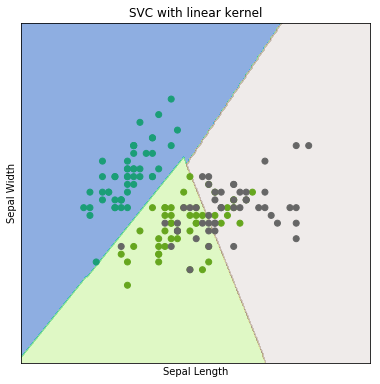

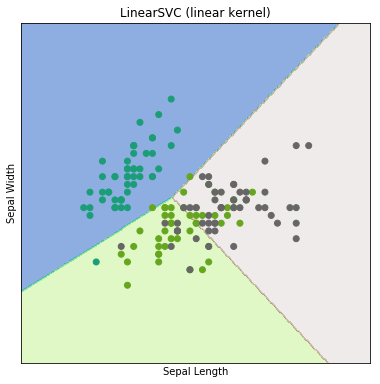

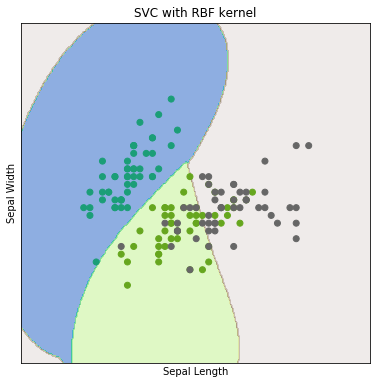

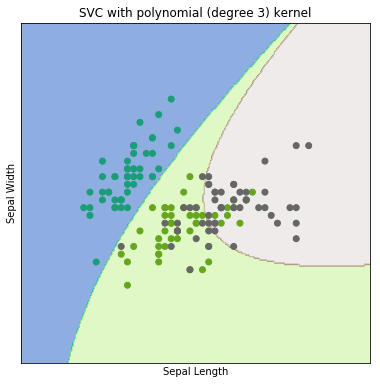

In [25]:
# Create a loop for plotting all the contours one at a time

for i,mod in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    # Set figsize for the entire area of subplots
    plt.figure(figsize=(15,15))
    
    # Create a plot of 2 by 2 subplots
    plt.subplot(2,2,i+1)
    
    # Decide the height and width of each subplot
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    # Take the prediction of the model for the entire meshgrid values converted into 1-d array
    z = mod.predict(np.c_[xx.ravel(),yy.ravel()])
    
    # Reshape the predictions back to the shape of meshgrid
    z = z.reshape(xx.shape)
    
    # Create a filled contour with a colormap and some transparency
    plt.contourf(xx,yy,z,cmap=plt.cm.terrain,alpha=0.5)
    
    # Create a scatterplot with Sepal length (feature 1) on X-axis and Sepal Width (feature 2) on Y-axis
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    # Label the axes
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    
    # Bound the minimum and maximum axes values
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [26]:
# We can see how the different kernels separate the data in different ways